In [2]:
import numpy as np
import pandas as pd
import os
import sys

from matplotlib import pyplot as plt
import seaborn as sns
import venn

In [60]:
# create dir for figures, and load data
fig_dir="./Figures"
os.makedirs(fig_dir,exist_ok=True)
search_data = pd.read_csv("../data/search_data.csv") # load search data
registry_data = pd.read_csv("../data/registry_data.csv") # load registry data (not public avaiable due to data protection protocol)

In [61]:
# Merge the search and registry data
year_data = search_data.merge(registry_data,on=['disease','year'],how='outer')

In [62]:
# statistics

# overall statistics
display(year_data.groupby('year').agg({'search_estimated_patients':'sum','registry_patients':'sum'}))

# Calculate and display the diseases with search patients > registry patients for all 4 years and vice versa
Search_more = year_data.loc[year_data.registry_patients<year_data.search_estimated_patients].disease.value_counts()
Search_more_disease = Search_more.loc[Search_more==4].index
Search_less = year_data.loc[year_data.registry_patients>year_data.search_estimated_patients].disease.value_counts()
Search_less_disease = Search_less.loc[Search_less==4].index
print("Search more than registry: %d, Registry more than search: %d"%(len(Search_more_disease),
                                                                      len(Search_less_disease)))

,search_estimated_patients,registry_patients
year,,
2016,103438,28610
2017,128521,34360
2018,117431,41993
2019,138002,48264


Search more than registry: 46, Registry more than search: 37


In [63]:
# Top 10 ranking diseases for search and registry data, respectively
display(year_data.loc[year_data.search_rank<=10].sort_values(by=['year','search_rank'])[['disease','search_rank']])
display(year_data.loc[year_data.registry_rank<=10].sort_values(by=['year','registry_rank'])[['disease','registry_rank']])

,disease,search_rank
0,Albinism,1
1,Osteogenesis Imperfecta,2
2,Hemophilia,3
3,Generalized Myasthenia Gravis,4
4,Amyotrophic Lateral Sclerosis,5
5,Systemic Sclerosis,6
6,Phenylketonuria,7
7,Multiple Sclerosis,8
8,Hepatolenticular Degeneration,9
9,Retinitis Pigmentosa,10


,disease,registry_rank
2,Hemophilia,1
21,Neuromyelitis Optica,2
7,Multiple Sclerosis,3
5,Systemic Sclerosis,4
25,Multiple System Atrophy,5
3,Generalized Myasthenia Gravis,6
8,Hepatolenticular Degeneration,7
17,Idiopathic Pulmonary Arterial Hypertension,8
19,Autoimmune Encephalitis,9
4,Amyotrophic Lateral Sclerosis,10


In [64]:
# group registry and search rank into groups (20 diseases a group)
year_data["registry_rank_group"] = (year_data["registry_rank"]/20).astype(int)
year_data.loc[year_data.registry_rank_group==6,"registry_rank_group"]=5
year_data["search_rank_group"] = (year_data["search_rank"]/20).astype(int)
year_data.loc[year_data.search_rank_group==6,"search_rank_group"]=5

In [65]:
# correlation between search rank group and average registry rank
from scipy import stats
for i in range(2016,2020):
    a = year_data.loc[year_data.year==i].groupby("search_rank_group").registry_rank.mean().reset_index().sort_values(
        by="search_rank_group").registry_rank.tolist()
    print(stats.pearsonr(range(len(a)),a))

(0.9569475230416531, 0.002740374435835146)
(0.9538992244805171, 0.003138933692492399)
(0.9818834172185176, 0.0004893428305216745)
(0.9807297113574754, 0.0005534380832817096)


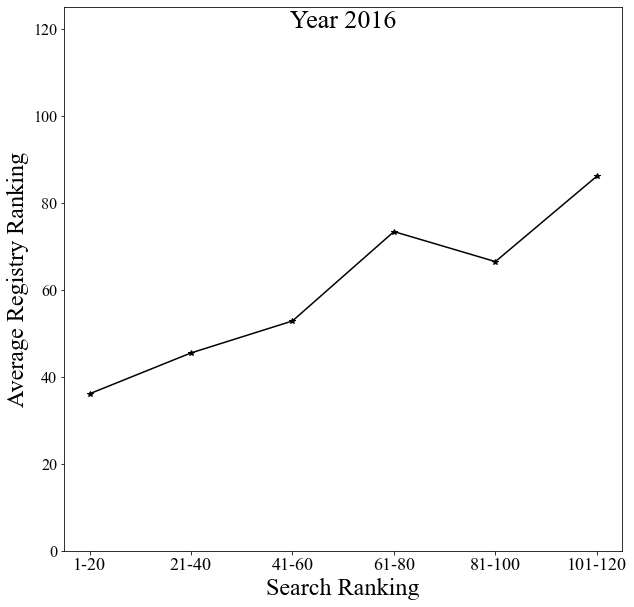

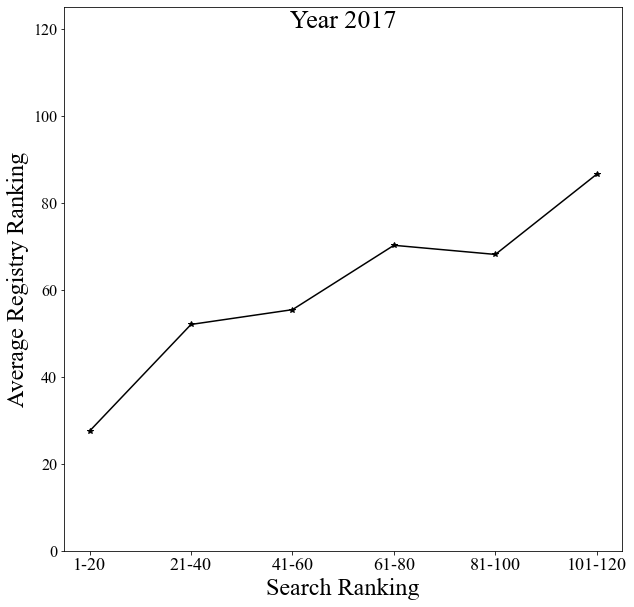

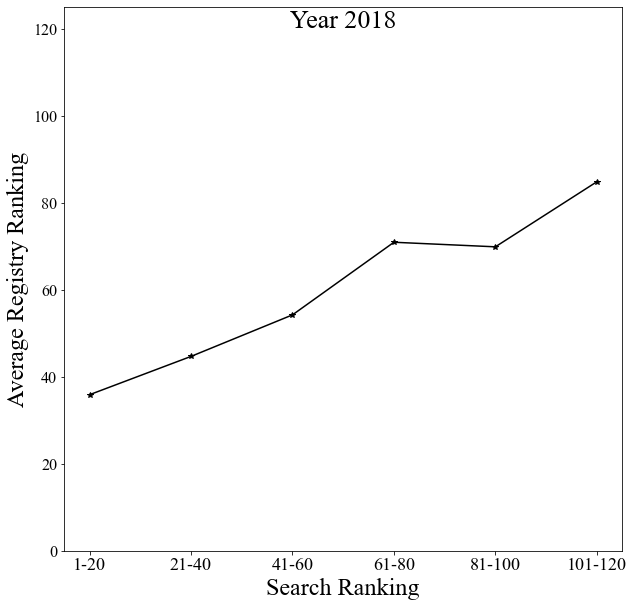

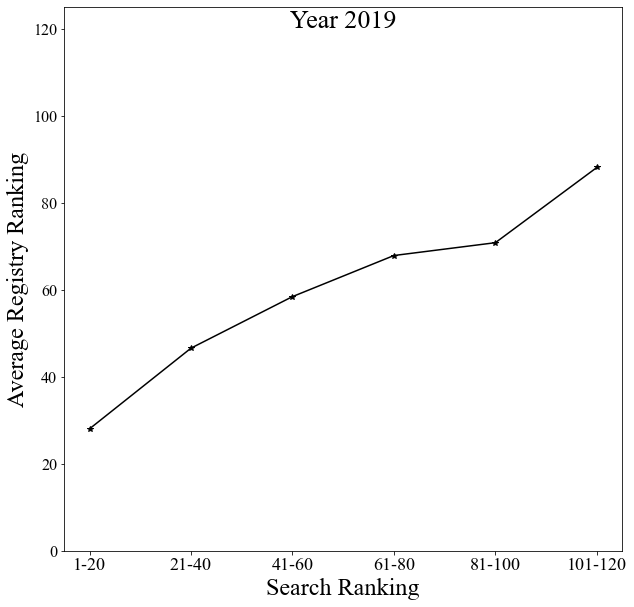

In [66]:
# plot the search rank group and average registry rank
plt.rcParams['font.sans-serif'] = 'times new roman' 
plt.rcParams['axes.unicode_minus'] = False 
for i in range(2016,2020):
    plt.figure(figsize=(10,10))
    ax = plt.subplot()
    a = year_data.loc[year_data.year==i].groupby("search_rank_group").registry_rank.mean().reset_index().sort_values(
        by="search_rank_group").registry_rank.tolist()
    ax.plot(a,marker='*',color='black')
    ax.set_title("Year %d"%(i),fontsize=26,y=0.95)
    x_labels = []
    for j in range(6):
        x_labels.append("%d-%d"%(j*20+1,j*20+20 if j<5 else 120))
    ax.set_xticks(range(6))
    ax.set_xticklabels(x_labels,fontsize=18)
    ax.set_xlabel("Search Ranking",fontsize=24)
    ax.set_ylabel("Average Registry Ranking",fontsize=24)
    ax.set_ylim(0,125)
    ax.set_yticks(np.arange(0,130,20))
    ax.set_yticklabels(np.arange(0,130,20).round(0),fontsize=16)
    plt.savefig(os.path.join(fig_dir,"Ranking_group_year%d_searchx.png"%(i)))

In [67]:
# calculate the rdg
year_data["rank_diff"] = year_data.search_rank - year_data.registry_rank
year_data['rank_diff_group'] = pd.cut(year_data.rank_diff,bins=[-200,-20,20,200],labels=False)
# add the zero intercept
zeros = pd.DataFrame(np.zeros(year_data.shape[1])).T
zeros.columns = year_data.columns
zeros['rank_diff_group'] = 1
year_data_zeros = pd.concat([zeros,year_data],axis=0)

In [68]:
# to fit a generalzed linear model
import statsmodels.api as sm
import statsmodels.formula.api as smf
glm = smf.glm(formula=f"rank_diff_group ~ C(year) + C(disease)",
       data = year_data_zeros)
glmf = glm.fit()
display(glmf.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        rank_diff_group   No. Observations:                  481
Model:                            GLM   Df Residuals:                      357
Model Family:                Gaussian   Df Model:                          123
Link Function:               identity   Scale:                        0.091953
Method:                          IRLS   Log-Likelihood:                -36.860
Date:                Sat, 01 Jul 2023   Deviance:                       32.827
Time:                        21:13:37   Pearson chi2:                     32.8
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                       1.0000      0.303      3.298      0.001       0.406       1.594
C(year)[T.2016.0]                                                              -0.0244      0.295     -0.083      0.934      -0.602       0.553
C(year)[T.2017.0]                                                              -0.0577      0.295     -0.196      0.845      -0.635       0.520
C(year)[T.2018.0]                                                               0.0256      0.295      0.087      0.931      -0.552       0.603
C(year)[T.2019.0]                                                              -0.0161      0.295     -0.054      0.957      -0.594       0.562
C(disease)[T.21-Hydroxylase Deficiency]                                         1.0181      0.151      6.729      0.000       0.722       1.315
C(disease)[T.Albinism]                                                         -0.9819      0.151     -6.489      0.000      -1.278      -0.685
C(disease)[T.Alport Syndrome]                                                   0.0181      0.151      0.120      0.905      -0.278       0.315
C(disease)[T.Amyotrophic Lateral Sclerosis]                                     0.0181      0.151      0.120      0.905      -0.278       0.315
C(disease)[T.Angelman Syndrome]                                                -0.2319      0.151     -1.532      0.125      -0.528       0.065
C(disease)[T.Arginase Deficiency]                                              -0.9819      0.151     -6.489      0.000      -1.278      -0.685
C(disease)[T.Asphyxiating Thoracic Dystrophy]                                   0.0181      0.151      0.120      0.905      -0.278       0.315
C(disease)[T.Atypical Hemolytic Uremic Syndrome]                                0.0181      0.151      0.120      0.905      -0.278       0.315
C(disease)[T.Autoimmune Encephalitis]                                           0.0181      0.151      0.120      0.905      -0.278       0.315
C(disease)[T.Autoimmune Hypophysitis]                                           0.7681      0.151      5.077      0.000       0.472       1.065
C(disease)[T.Autoimmune Insulin Receptopathy]                                  -0.9819      0.151     -6.489      0.000      -1.278      -0.685
C(disease)[T.Biotinidase Deficiency]                                            1.0181      0.151      6.729      0.000       0.722       1.315
C(disease)[T.Cardiac Ion Channelopathies]                                      -0.9819      0.151     -6.489      0.000      -1.278      -0.685
C(disease)[T.Castleman Disease]                            

In [69]:
# average effect of three different disease groups
a = glmf.summary()
results = pd.DataFrame(a.tables[1].data[1:],columns=['name']+a.tables[1].data[0][1:])
results['disease'] = results['name'].apply(lambda x: x.split('T.')[1].strip(']') if 'disease' in x 
                                           else -1)
results = results.merge(year_data.loc[year_data.year==2016][['disease','rank_diff_group']],
                       on=['disease'],how='left')
metrics = {'coef':'mean','z':'mean','P>|z|':'mean','[0.025':'mean','0.975]':'mean'}
for m in metrics:
    results[m] = results[m].astype(float)
results.groupby('rank_diff_group').agg(metrics).round(3)

,coef,z,P>|z|,[0.025,0.975]
rank_diff_group,,,,,
0.0,-0.821,-5.427,0.014,-1.117,-0.524
1.0,0.014,0.095,0.629,-0.282,0.311
2.0,0.878,5.804,0.009,0.582,1.175
